<a href="https://colab.research.google.com/github/Chandanapentakota/Cognorise/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("train.csv")

In [ ]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
dataset.shape

(2000, 21)

In [ ]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: xlabel='price_range', ylabel='int_memory'>

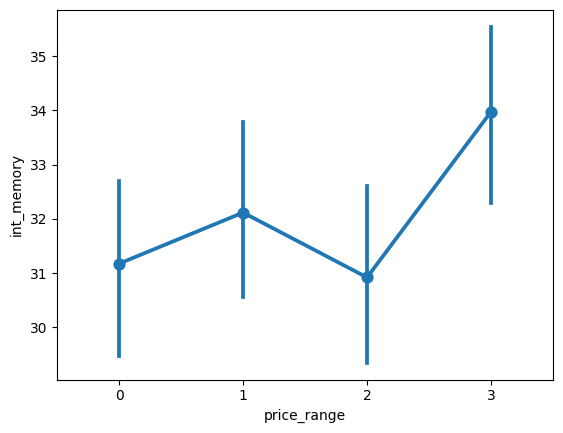

In [ ]:
sns.pointplot(y= "int_memory", x ="price_range", data=dataset)

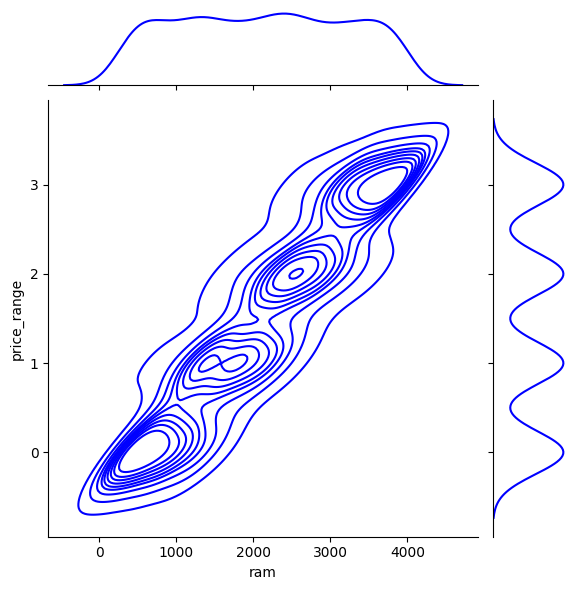

In [ ]:
sns.jointplot(x = 'ram' , y= 'price_range', data=dataset, color='blue', kind='kde')

<Axes: xlabel='price_range', ylabel='battery_power'>

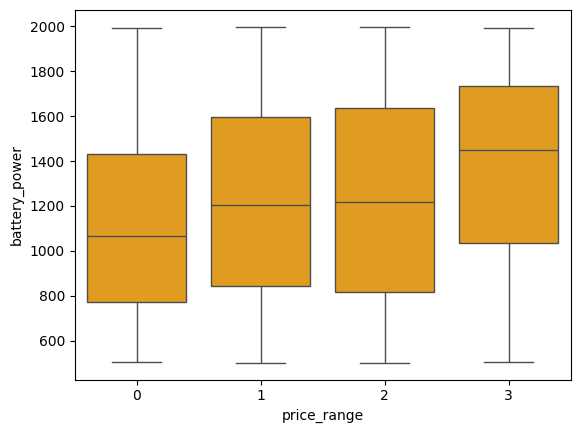

In [ ]:
sns.boxplot(x= "price_range", y ="battery_power", data=dataset, color="orange")

In [ ]:
dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

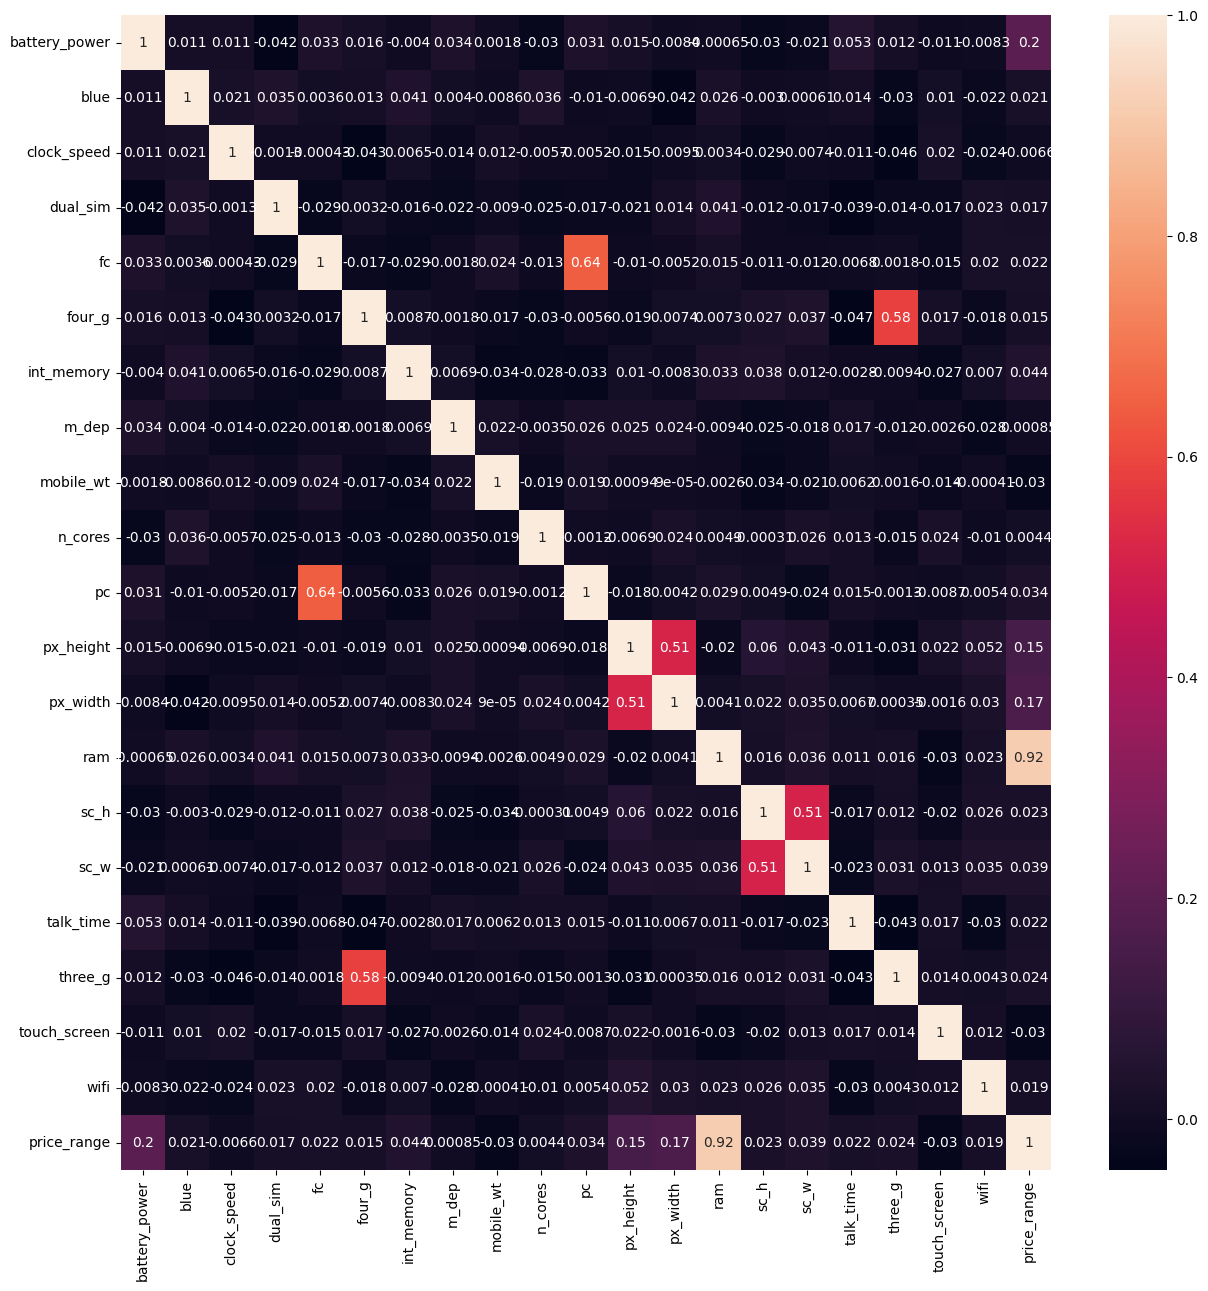

In [ ]:
cor_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor_mat,annot=True)

In [ ]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [ ]:
X[0]

array([8.420e+02, 0.000e+00, 2.200e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       7.000e+00, 6.000e-01, 1.880e+02, 2.000e+00, 2.000e+00, 2.000e+01,
       7.560e+02, 2.549e+03, 9.000e+00, 7.000e+00, 1.900e+01, 0.000e+00,
       0.000e+00, 1.000e+00])

In [ ]:
y[0]

1

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [ ]:
x_train.shape

(1500, 20)

In [ ]:
x_test.shape

(500, 20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 15,criterion = 'entropy')
classifier1.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [ ]:
y_pred1 = classifier1.predict(x_test)
y_pred1

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 1, 3, 1, 3, 1, 0, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 2, 3, 0, 0, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 1, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 2, 0, 3, 1, 1, 0, 2, 3, 2, 1, 0, 0, 1, 3,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 2, 3, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 3, 0, 2, 0, 1,

<Axes: >

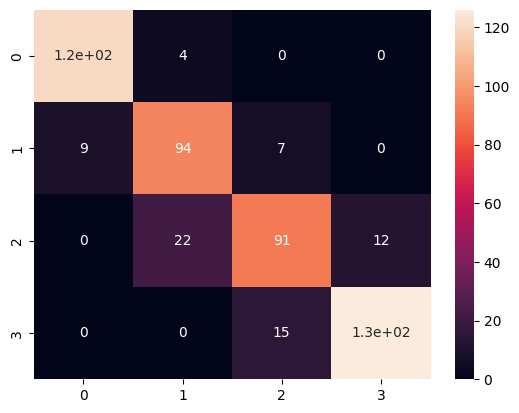

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm , annot = True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.862

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 39,metric = 'minkowski')
classifier2.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=39)

In [ ]:
y_pred2 = classifier2.predict(x_test)

In [ ]:
y_pred2

array([3, 0, 2, 1, 1, 0, 0, 2, 3, 0, 1, 3, 1, 2, 2, 1, 3, 2, 1, 0, 1, 0,
       3, 2, 1, 2, 3, 2, 2, 0, 0, 0, 1, 0, 1, 3, 0, 1, 3, 3, 2, 2, 3, 2,
       0, 3, 1, 2, 2, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 3, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 3, 2, 0, 1, 0, 2, 1,
       1, 3, 1, 2, 1, 0, 2, 3, 3, 3, 0, 3, 0, 2, 2, 1, 2, 2, 2, 2, 2, 3,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 0, 1, 0, 3, 0, 3,
       2, 3, 3, 3, 2, 1, 0, 1, 0, 2, 1, 2, 0, 3, 0, 0, 2, 0, 1, 1, 1, 0,
       3, 1, 0, 3, 1, 2, 2, 0, 2, 2, 1, 3, 3, 1, 2, 0, 3, 1, 1, 3, 3, 0,
       2, 1, 3, 1, 2, 2, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 2, 0, 0, 2,
       2, 0, 3, 3, 3, 1, 3, 3, 3, 3, 0, 0, 0, 2, 2, 3, 0, 0, 1, 2, 1, 3,
       2, 3, 0, 0, 2, 3, 2, 0, 1, 1, 1, 1, 0, 3, 2, 1, 2, 1, 1, 1, 0, 2,
       2, 3, 1, 0, 1, 3, 3, 1, 3, 0, 3, 1, 0, 0, 2, 3, 3, 1, 0, 1, 1, 1,
       3, 1, 2, 2, 2, 1, 0, 2, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 1, 0, 0,
       1, 2, 1, 2, 0, 1, 3, 0, 3, 2, 3, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.61

In [ ]:
y_sample = np.array([[0,964,1,3.5,0,2,1,44,0.6,162,1,1300,1412,1528,8,2,15,1,1,0]])

In [ ]:
y_scaled = sc.transform(y_sample)

In [ ]:
y_scaled

array([[-2.79171463e+00,  1.92757922e+03, -6.66161930e-01,
         5.97434240e+00, -9.78945578e-01,  2.96831619e+00,
        -1.68976409e+00,  1.50902747e+02, -3.95076982e+00,
         6.92435983e+01, -1.45246689e+00,  1.44314077e+00,
         3.40982025e-01, -5.34286195e-01, -1.03958160e+00,
        -8.71503705e-01,  7.24467204e-01,  5.61951487e-01,
         1.01072417e+00, -1.02840321e+00]])

In [ ]:
classifier1.predict(y_scaled)

array([1])